In [25]:
!pip install ../ta -U
# !pip install neat-python -U
# !pip install tensortrade[tensorforce] -U --user

Processing c:\users\codeninja\dev\ta
  Created wheel for ta: filename=ta-0.4.7-cp37-none-any.whl size=18717 sha256=3123ccceda02c5ac432377d5bf2bf482b81a246b78a23a2a32dcbf775cf2ab25
  Stored in directory: C:\Users\CODENI~1\AppData\Local\Temp\pip-ephem-wheel-cache-n2h8vvo4\wheels\71\d3\81\76a2b4c89b367a05e6c899b7dbeffa9e9a257871c466c4597e
Successfully built ta
  Found existing installation: ta 0.4.7
    Uninstalling ta-0.4.7:
      Successfully uninstalled ta-0.4.7


In [26]:
import tensorflow as tf
tf.enable_eager_execution()
tf.executing_eagerly()


True

In [27]:
import os
import sys
import warnings
import numpy
import ccxt
import pandas as pd
import numpy as np
from time import time

import cProfile as cp


config = './neat.config'

def warn(*args, **kwargs):
    pass

warnings.warn = warn
warnings.simplefilter(action='ignore', category=FutureWarning)
numpy.seterr(divide = 'ignore') 

sys.path.append(os.path.dirname(os.path.abspath('')))
sys.path.append(os.path.abspath('')+"\\tensortrade")
sys.path

['C:\\Users\\codeninja\\Dev\\trader',
 'C:\\Users\\codeninja\\Anaconda3\\envs\\tt_fresh\\python37.zip',
 'C:\\Users\\codeninja\\Anaconda3\\envs\\tt_fresh\\DLLs',
 'C:\\Users\\codeninja\\Anaconda3\\envs\\tt_fresh\\lib',
 'C:\\Users\\codeninja\\Anaconda3\\envs\\tt_fresh',
 '',
 'C:\\Users\\codeninja\\AppData\\Roaming\\Python\\Python37\\site-packages',
 'C:\\Users\\codeninja\\Anaconda3\\envs\\tt_fresh\\lib\\site-packages',
 'C:\\Users\\codeninja\\Anaconda3\\envs\\tt_fresh\\lib\\site-packages\\win32',
 'C:\\Users\\codeninja\\Anaconda3\\envs\\tt_fresh\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\codeninja\\Anaconda3\\envs\\tt_fresh\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\codeninja\\Anaconda3\\envs\\tt_fresh\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\codeninja\\.ipython',
 'C:\\Users\\codeninja\\Dev',
 'C:\\Users\\codeninja\\Dev\\trader\tensortrade',
 'C:\\Users\\codeninja\\Dev',
 'C:\\Users\\codeninja\\Dev\\trader\tensortrade',
 'C:\\Users\\codeninja\\Dev',
 'C:\\Users\

**Import dataframe**

In [28]:
# number of days we want to pull from the dataframe 
days_of_data = 1

# number of data frames (our DF is in 1h timesteps)
frames = days_of_data * 24
train_test_percentage = 0.2

x_train = int(frames * (1 - train_test_percentage))
x_test = int(frames - x_train)



In [29]:
data_file ='./data/processed/binance/btc_usdt_1h.csv' 
df = pd.read_csv(data_file, index_col=[0])

df_train = df[-frames:(-x_test - 1)]
df_test = df[-x_test:]
print("Friend Shape", df.shape)
print('train shape', df_train.shape)
print('test shape', df_test.shape)
df.head()


Friend Shape (651, 5)
train shape (18, 5)
test shape (5, 5)


,open,high,low,close,volume
symbol,,,,,
2019-09-30 17:00:00,8222.58,8234.63,8201.00,8218.58,268.726159
2019-09-30 18:00:00,8219.33,8295.00,8217.93,8289.34,954.147243
2019-09-30 19:00:00,8289.97,8310.08,8188.00,8199.66,1870.174803
2019-09-30 20:00:00,8199.21,8295.00,8173.05,8269.83,1385.021420
2019-09-30 21:00:00,8269.83,8438.05,8265.14,8412.87,3944.916720


In [21]:
from neat_trading_strategy import NeatTradingStrategy as TradingStrategy


In [22]:
from tensortrade.rewards import SimpleProfitStrategy as ProfitStrategy
from tensortrade.actions import DiscreteActionStrategy as ActionStrategy
from tensortrade.exchanges.simulated import SimulatedExchange as Exchange
from tensortrade.features.scalers import MinMaxNormalizer
from tensortrade.features import FeaturePipeline

normalize = MinMaxNormalizer(columns=['open','close','high','low','volume'], inplace=True)

feature_pipeline = FeaturePipeline(steps=[normalize])

reward_strategy = ProfitStrategy()
action_strategy = ActionStrategy(n_actions=20, instrument_symbol='BTC/USDT')

exchange = Exchange(data_frame=df_test,
                    should_pretransform_obs = True,
                    base_instrument='USDT', 
                    timeframe='1h',
                    commission_percent=0.5,
                    window_size=1,
                    max_allowed_slippage_percent=3.0,
                    min_order_amount=1E-4,
                    min_trade_amount=1E-4
                   )

In [23]:
from tensortrade.environments import TradingEnvironment as Environment

environment = Environment(exchange=exchange,
                                 action_strategy=action_strategy,
                                 reward_strategy=reward_strategy,
                                 feature_pipeline=feature_pipeline)


strategy = TradingStrategy(environment=environment, neat_config=config)



In [24]:
cp.run("performance, winner, stats = strategy.run(generations=20)", 'evolution_stats')


 ****** Running generation 0 ****** 

*

KeyError: "['symbol'] not found in axis"

In [10]:
import pstats
from pstats import SortKey
p = pstats.Stats('evolution_stats')
p.strip_dirs().sort_stats("cumtime").print_stats(20)

Thu Oct 24 13:49:48 2019    evolution_stats

         3277 function calls (3275 primitive calls) in 135.027 seconds

   Ordered by: cumulative time
   List reduced from 133 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000  135.027  135.027 {built-in method builtins.exec}
        1    0.000    0.000  135.027  135.027 <string>:1(<module>)
        1    0.000    0.000  135.027  135.027 neat_trading_strategy.py:136(run)
        1    0.000    0.000  135.025  135.025 population.py:59(run)
        1    0.000    0.000  135.024  135.024 neat_trading_strategy.py:82(_eval_population)
        1    0.000    0.000  135.024  135.024 neat_trading_strategy.py:89(eval_genome)
        1    0.000    0.000  135.023  135.023 profilehooks.py:239(new_fn)
        1    0.000    0.000  135.023  135.023 profilehooks.py:338(__call__)
        1    0.000    0.000  135.023  135.023 cProfile.py:106(runcall)
        1  135.023  135.023  13

In [11]:
exchange.trades

,step,symbol,type,amount,price


**Evaluate**

**Save Strategy**

In [12]:
import visualize

node_names = {-1:'Open', -2: 'High', -3: "Low", -4: "Close", -5:"Volume", 0:'Action'}
visualize.plot_stats(stats, ylog=False, view=True)


<Figure size 640x480 with 1 Axes>

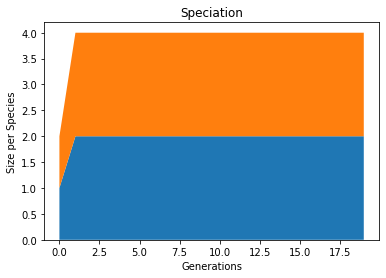

In [13]:
visualize.plot_species(stats, view=True)

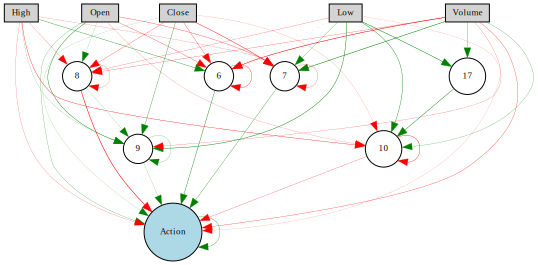

In [14]:
visualize.draw_net(strategy._config, winner, False, node_names=node_names)
